In [ ]:
#Import Libraries and data set

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [2]:
df = pd.read_csv('Thyroid_Diff.csv')

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [6]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [7]:
df.dtypes

Age                     int64
Gender                  int32
Smoking                 int32
Hx Smoking              int32
Hx Radiothreapy         int32
Thyroid Function        int32
Physical Examination    int32
Adenopathy              int32
Pathology               int32
Focality                int32
Risk                    int32
T                       int32
N                       int32
M                       int32
Stage                   int32
Response                int32
Recurred                int32
dtype: object

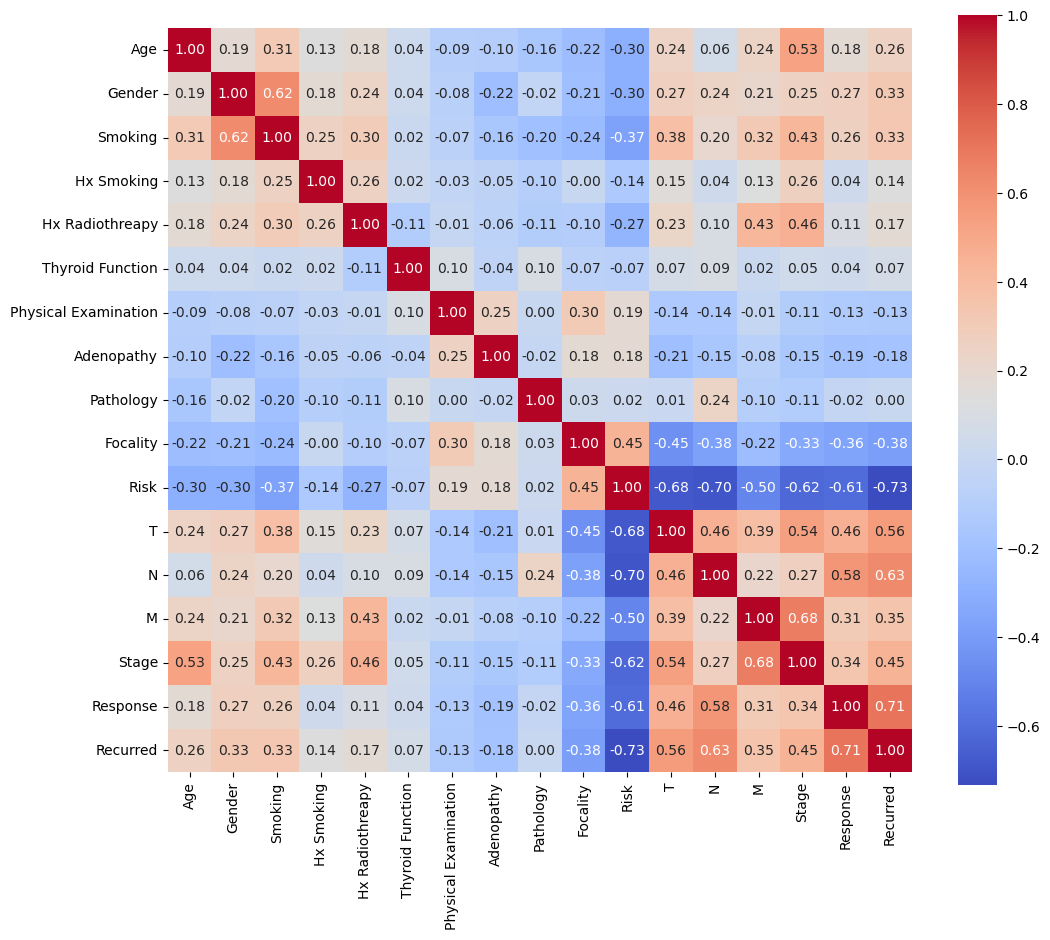

In [39]:
#plotting Correlation Matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.show()

In [40]:
#Plotting All Possible basic graphs

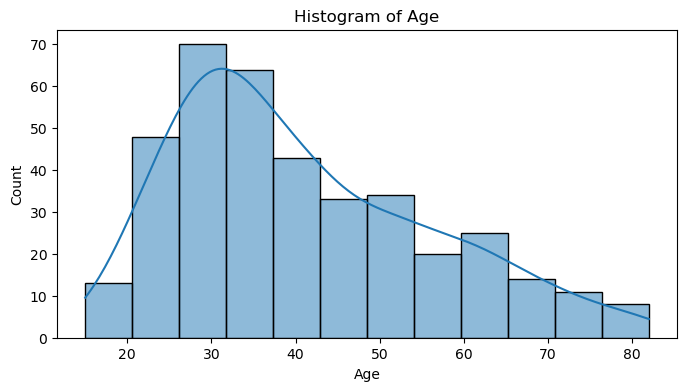

In [18]:
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

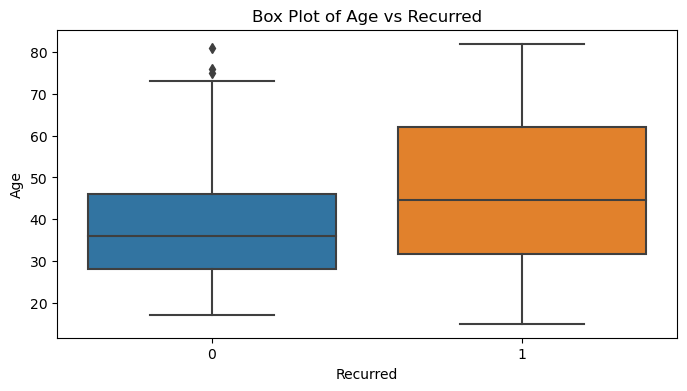

In [19]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Recurred', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Recurred')
    plt.show()

In [21]:
for column in df.columns:
    df[column] = df[column].astype('category')

In [23]:
df.dtypes

Age                     category
Gender                  category
Smoking                 category
Hx Smoking              category
Hx Radiothreapy         category
Thyroid Function        category
Physical Examination    category
Adenopathy              category
Pathology               category
Focality                category
Risk                    category
T                       category
N                       category
M                       category
Stage                   category
Response                category
Recurred                category
dtype: object

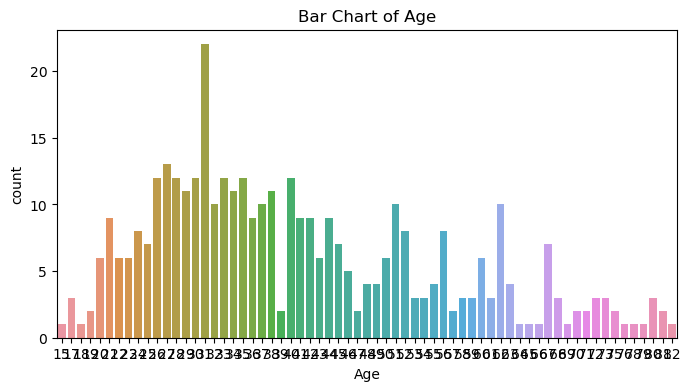

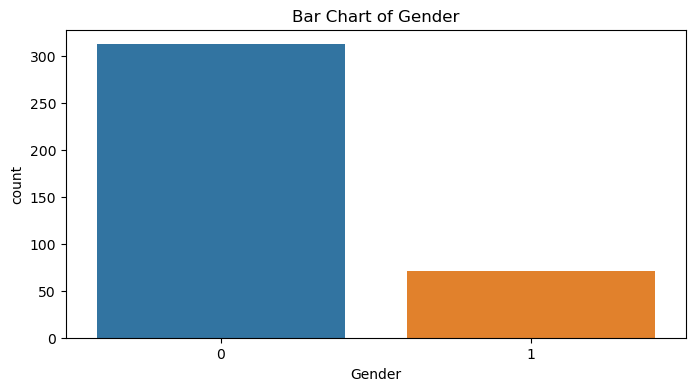

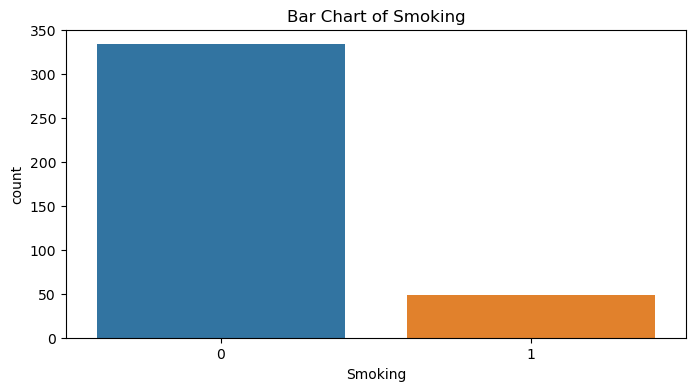

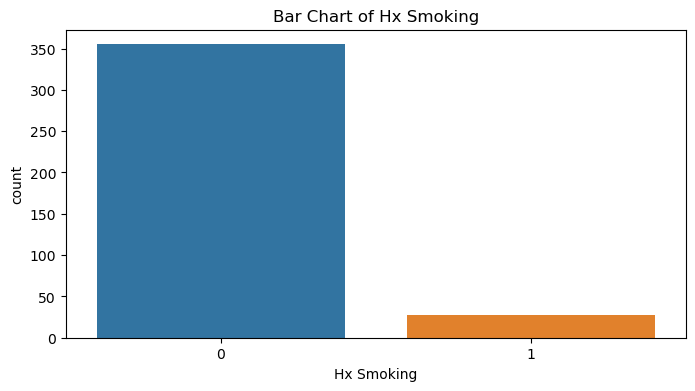

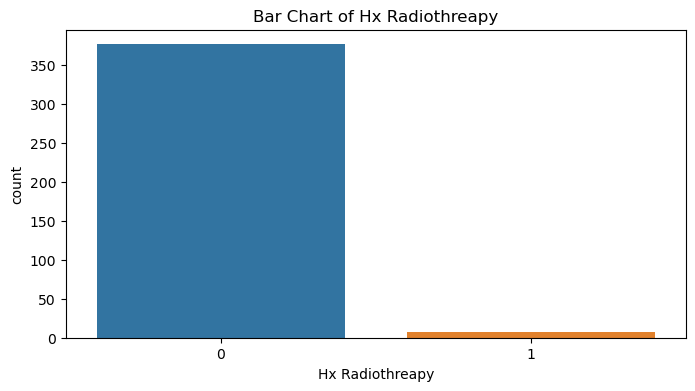

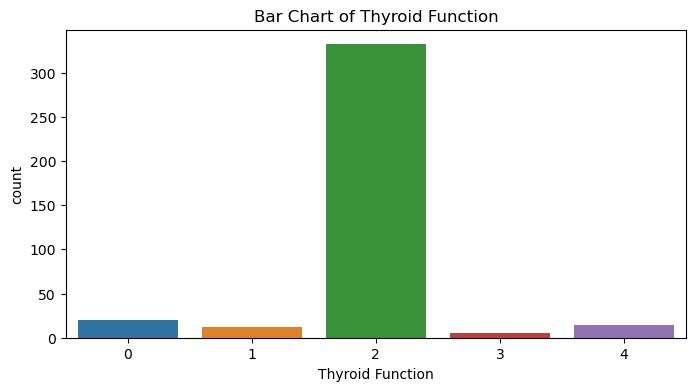

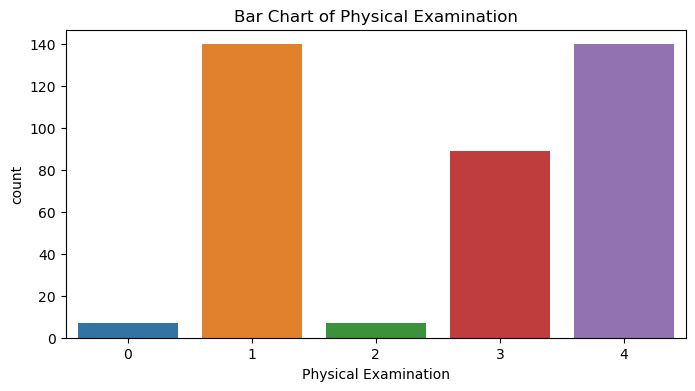

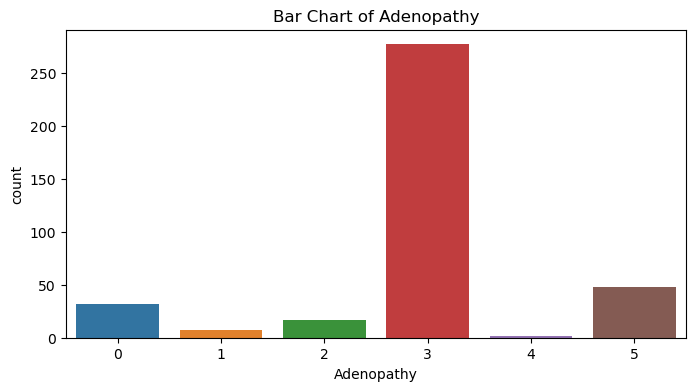

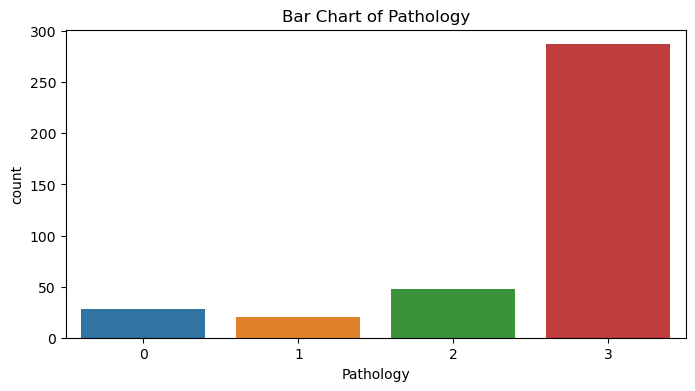

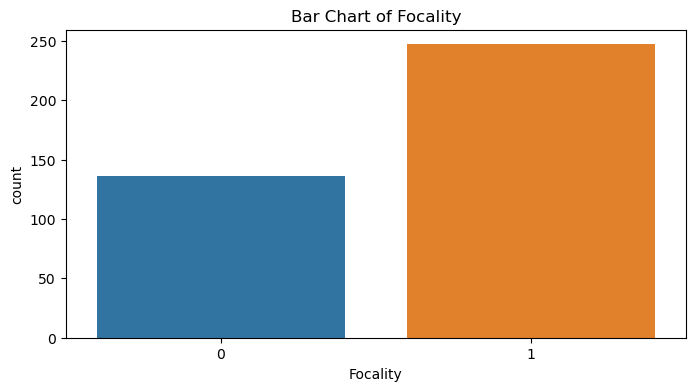

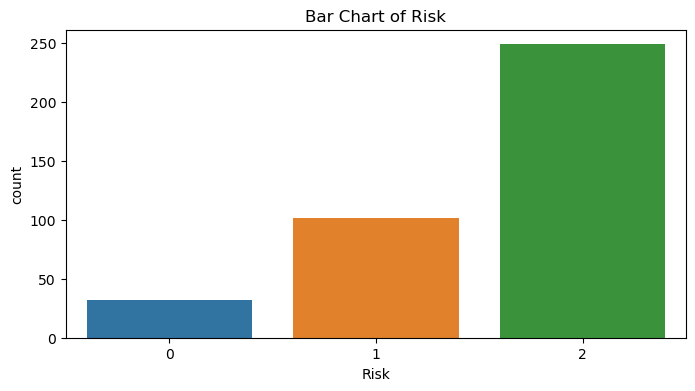

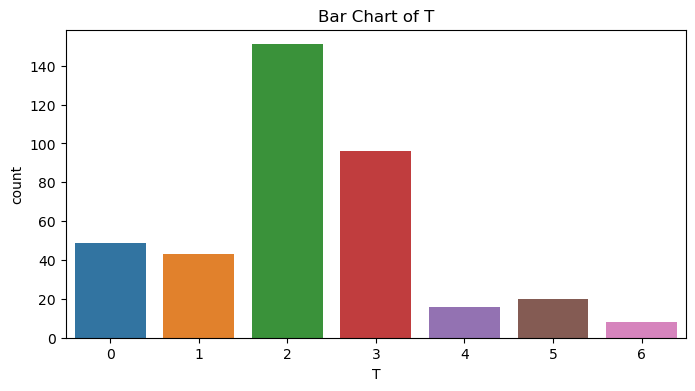

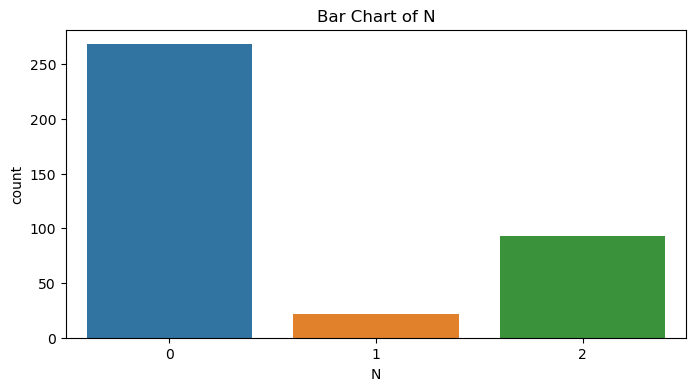

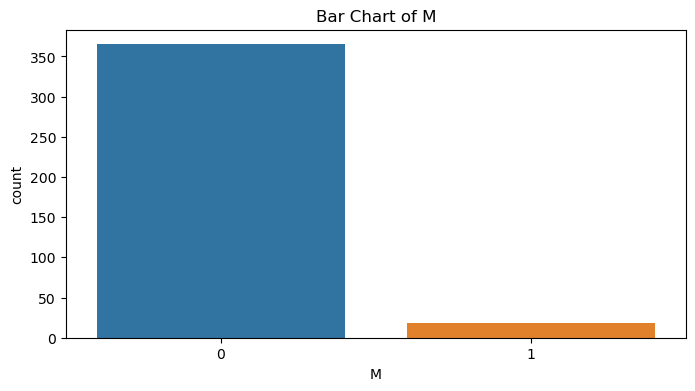

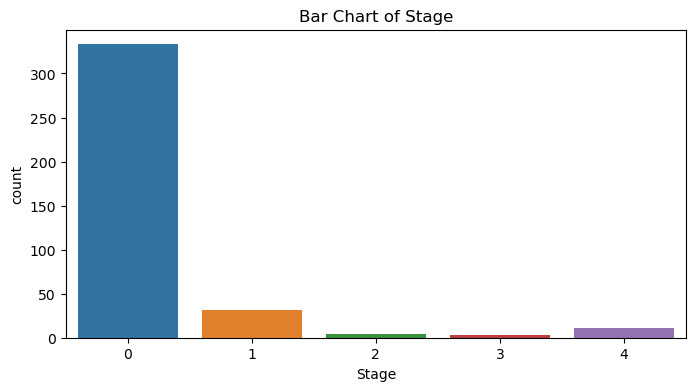

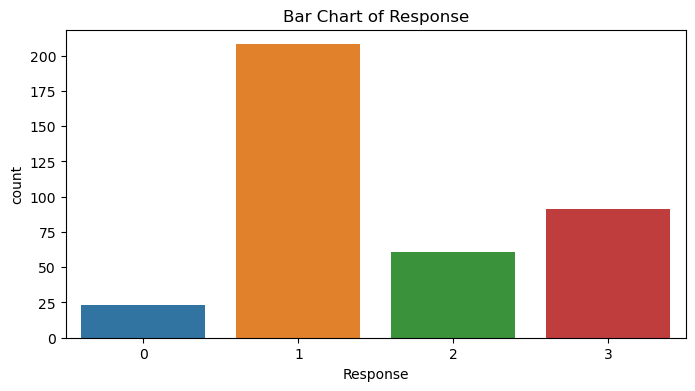

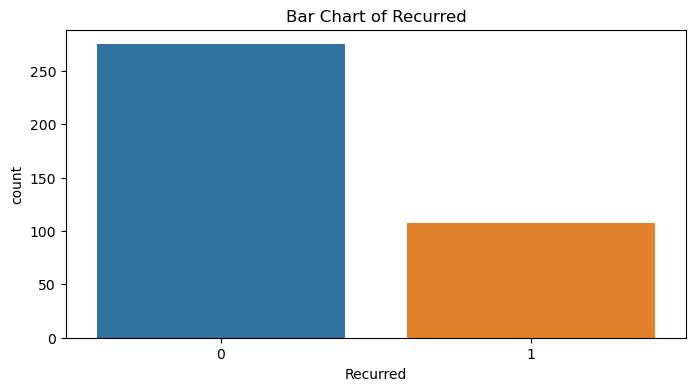

In [25]:
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Bar Chart of {feature}')
    plt.show()

In [27]:
#Running Randomforest to get importance of features
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Fitting Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

# Getting the feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df

,Feature,Importance
0,Response,0.409067
1,Risk,0.172597
2,N,0.104841
3,T,0.061051
4,Age,0.061033
5,Adenopathy,0.045586
6,Stage,0.036998
7,Physical Examination,0.021886
8,Focality,0.017895
9,Gender,0.015454


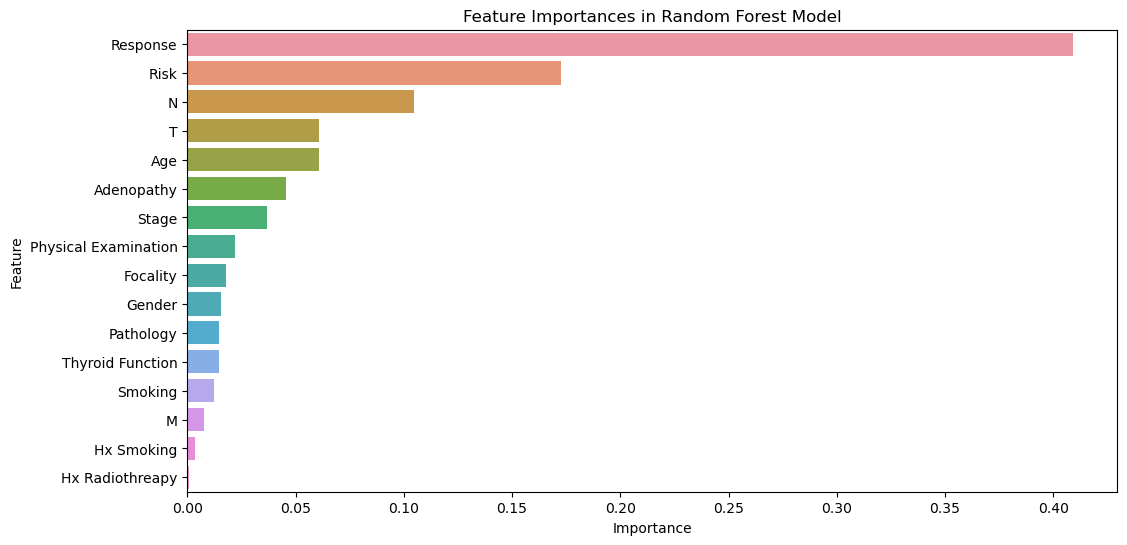

In [28]:
# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Decision Tree Accuracy: 0.8913


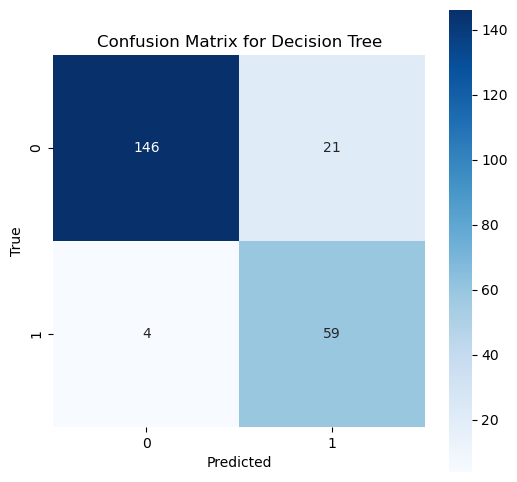

Random Forest Accuracy: 0.9652


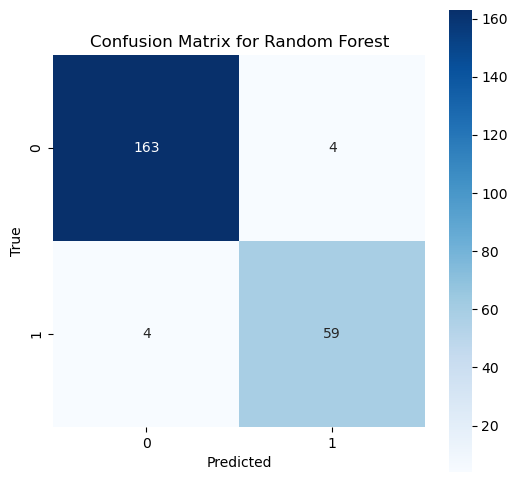

Logistic Regression Accuracy: 0.8913


C:\Users\hetan\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


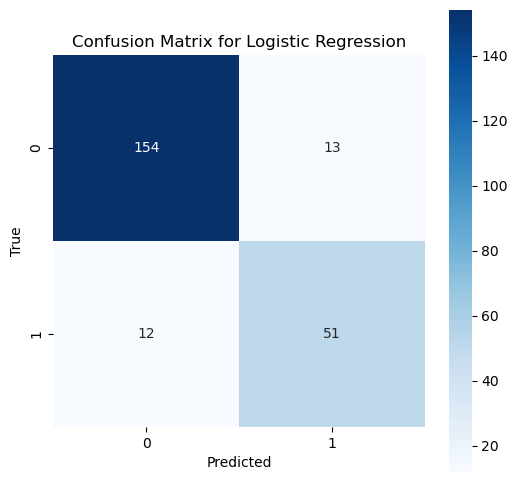

C:\Users\hetan\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9000


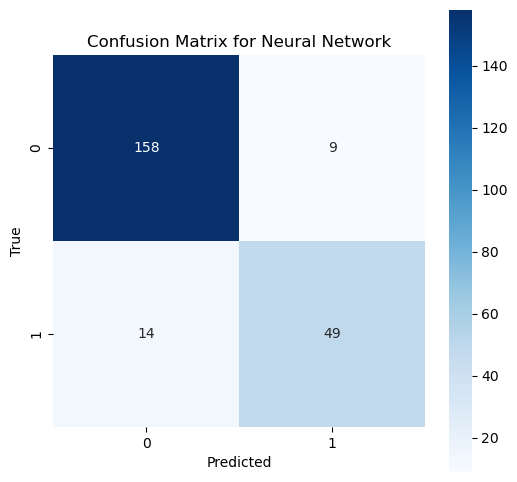

SVM Accuracy: 0.7696


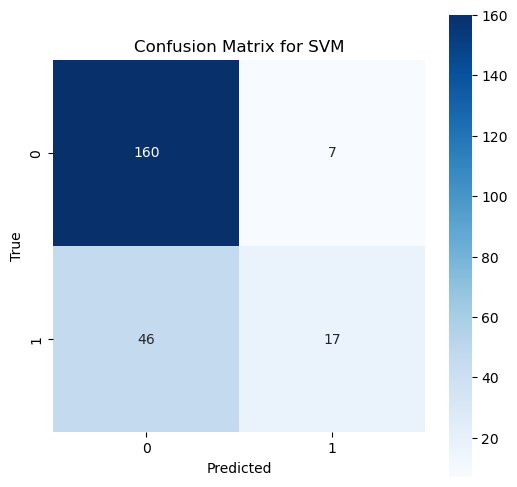

Naive Bayes Accuracy: 0.9043


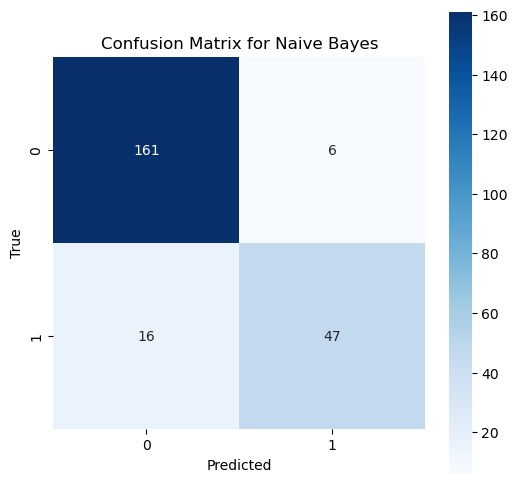

Gradient Boosting Accuracy: 0.9217


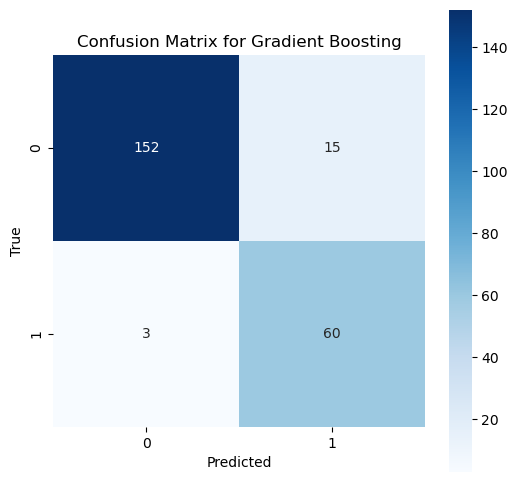

AdaBoost Accuracy: 0.9696


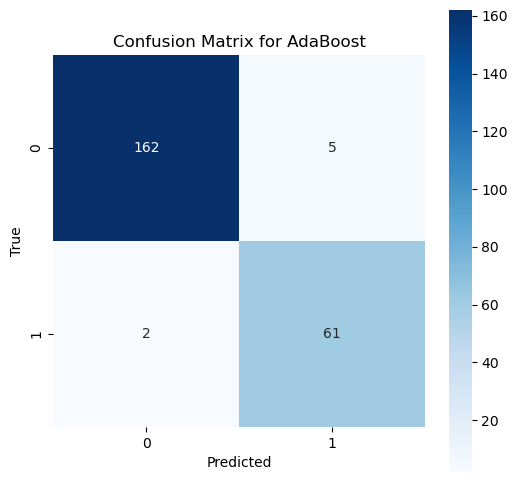

In [38]:
#Running a loop for all algorthims to run
target_column = 'Recurred'
features = df.drop(columns=[target_column])
target = df[target_column]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=42)

# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Loop through classifiers, train models, and print accuracies
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    predictions = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Print the results
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()